# Sarsa Algorithm


Our agent needs to cross a lake, represented by a square divided with a 4x4 grid. At every step he needs to take an action, he can go up, down, left or right. If it's not possible to go to the chosen direction our agent will simply not move.

Each grid element can be frozen, in that case our agent will be able to move, it can he a hole, in that case the episodes end and we don't get the reward or it can be the final state, the goal. In that case the agent will receive a positive reward.


In [5]:
%matplotlib inline
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Meta parameters for the RL agent
alpha = 0.1
gamma = 0.99
epsilon = 0.5
epsilon_decay = 0.999
verbose = False

# Define types of algorithms

# Choose methods for learning and exploration
rl_algorithm = "SARSA"

explore_methods = ['GREEDY', 'EPSILON_GREEDY', 'SOFTMAX']
explore_method = explore_methods[1]

print(f'Explore mehtod chosen: {explore_method}')

Explore mehtod chosen: EPSILON_GREEDY


In [2]:
def softmax(x):
    """
    Compute softmax values. 
    Returns a vector with probabilities.
    """
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum()


def take_action_sing_softmax(s, q):
    """Act with softmax"""
    prob_a = softmax(q[s, :])
    cumsum_a = np.cumsum(prob_a)
    return np.where(np.random.rand() < cumsum_a)[0][0]


def take_action_using_epsilon_greedy(s, q):
    """Act with epsilon greedy"""
    a = np.argmax(q[s, :])
    if np.random.rand() < epsilon:
        a = np.random.randint(q.shape[1])
    return a


def sarsa_update(q, s, a, r, s_prime, a_prime):
    """Compute SARSA update"""

    return 


def evaluate_policy(q, env, n, h, explore_type):
    """Evaluate a policy on n runs"""

    success_rate = 0.0
    mean_return = 0.0

    for i in range(n):
        discounted_return = 0.0
        s = env.reset()

        for step in range(h):
            if explore_type == "GREEDY":
                s, r, done, info = env.step(1) # Change here
            elif explore_type == "EPSILON_GREEDY":
                s, r, done, info = env.step(1) # Change here    
            elif explore_type == "SOFTMAX":
                s, r, done, info = env.step(1) # Change here
            else:
                raise ValueError(
                    "Wrong Explore Method in evaluation:".format(explore_type))

            discounted_return += np.power(gamma, step) * r

            if done:
                success_rate += float(r) / n
                mean_return += float(discounted_return) / n
                break

    return success_rate, mean_return

In [3]:
# Choose environment
env_name = 'FrozenLake-v0'

# Random seed
np.random.RandomState(121)

# Create Environment
env = gym.make(env_name)

# Take State-Action space size
n_a = 0 # Complete here
n_s = 0 # Complete here

# Experimental setup
n_episode = 3000
print("n_episode ", n_episode)
max_horizon = 100
eval_steps = 10

# Monitoring performance
window = deque(maxlen=100)

greedy_success_rate_monitor = np.zeros([n_episode, 1])
greedy_discounted_return_monitor = np.zeros([n_episode, 1])

behaviour_success_rate_monitor = np.zeros([n_episode, 1])
behaviour_discounted_return_monitor = np.zeros([n_episode, 1])

# Init Q-table
q_table = np.zeros([n_s, n_a])

env.reset()

n_episode  3000


0

  (Down)
SFFF
FHFH
FFFH
HFFG


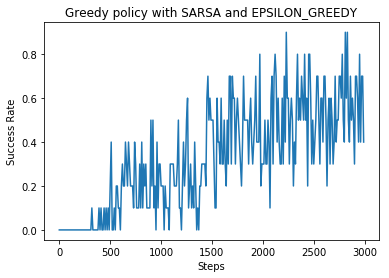

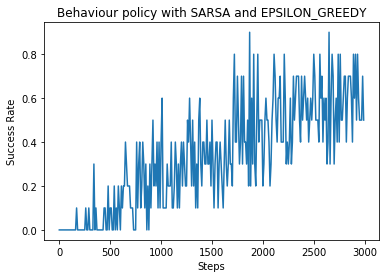

  (Down)
SFFF
FHFH
FFFH
HFFG
Episode: 1	 Num_Steps:    0	Total_Return:  0.81	Final_Reward: 0
LEFT
UP
LEFT
UP
LEFT
LEFT
LEFT
LEFT
UP
DOWN
LEFT
LEFT
LEFT
RIGHT
DOWN
LEFT


In [4]:
# Train for n_episode
for i_episode in range(n_episode):

    # Reset the expisode's cumulative reward
    total_return = 0.0

    # Start fresh with a new episode state
    s = env.reset()

    # Select the first action in this episode

    a = take_action_using_epsilon_greedy(s, q_table)

    for i_step in range(max_horizon):

        # Take action and receive the enviroment's feedback
        s_prime, r, done, info = env.step(a)

        total_return += np.power(gamma, i_step) * r

        # Select an action
        if explore_method == "SOFTMAX":
            a_prime = take_action_using_softmax(s_prime, q_table)
        elif explore_method == "EPSILON_GREEDY":
            a_prime = take_action_using_epsilon_greedy(s_prime, q_table)
        else:
            raise ValueError("Wrong Explore Method:".format(explore_method))

        # Update a Q value table
        if rl_algorithm == 'SARSA':
            q_table[s, a] = sarsa_update(q_table, s, a, r, s_prime, a_prime)
        else:
            raise ValueError("Wrong RL algorithm:".format(rl_algorithm))

        # Transition to new state
        s = s_prime
        a = a_prime

        if done:
            window.append(r)
            last_100 = window.count(1)

            greedy_success_rate_monitor[i_episode - 1, 0], greedy_discounted_return_monitor[
                i_episode - 1, 0] = evaluate_policy(q_table, env, eval_steps, max_horizon, explore_method)
            behaviour_success_rate_monitor[i_episode - 1, 0], behaviour_discounted_return_monitor[
                i_episode - 1, 0] = evaluate_policy(q_table, env, eval_steps, max_horizon, explore_method)
            if verbose:
                print(
                    "Episode: {0}\t Num_Steps: {1:>4}\tTotal_Return: {2:>5.2f}\tFinal_Reward: {3}\tEpsilon: {4:.3f}\tSuccess Rate: {5:.3f}\tLast_100: {6}".format(
                        i_episode, i_step, total_return, r, epsilon, greedy_success_rate_monitor[i_episode - 1, 0],
                        last_100))

            break

    # Schedule for epsilon
    epsilon = epsilon * epsilon_decay

env.render()

plt.figure(0)
plt.plot(range(0, n_episode, 10), greedy_success_rate_monitor[0::10, 0])
plt.title("Greedy policy with {0} and {1}".format(rl_algorithm, explore_method))
plt.xlabel("Steps")
plt.ylabel("Success Rate")

plt.figure(1)
plt.plot(range(0, n_episode, 10), behaviour_success_rate_monitor[0::10, 0])
plt.title("Behaviour policy with {0} and {1}".format(rl_algorithm, explore_method))
plt.xlabel("Steps")
plt.ylabel("Success Rate")
plt.show()

# Show an episod

for i_step in range(max_horizon):
    env.render()
    a = np.argmax(q_table[s, :])
    s, r, done, info = env.step(a)
    total_return += np.power(gamma, i_step) * r

    if done:
        print("Episode: {0}\t Num_Steps: {1:>4}\tTotal_Return: {2:>5.2f}\tFinal_Reward: {3}".format(1, i_step,
                                                                                                    total_return,
                                                                                                    r))
        break

# Show Policy

for s in range(n_s):
    actions = ['LEFT', 'DOWN', 'RIGHT', 'UP']
    print(actions[np.argmax(q_table[s, :])])